#Second Session of the Project- MODEL BUILDING PHASE:-





#Goal:-
To train different Machine Learning models that can predict whether a company will go bankrupt (1) or not bankrupt (0), based on features such as risks, flexibility, credibility, etc.

This is a binary classification problem, so we’ll use classification algorithms.

#Model Buliding Steps
**step 1 - Import Libraries**



In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os # Import the os module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_curve,precision_recall_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel("/content/Bankruptcy (2).xlsx")

In [ ]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [ ]:
df['class'] = df['class'].astype(str).str.lower().str.strip()
df['target'] = df['class'].apply(lambda x: 1 if 'bankruptcy' in x and 'non' not in x else 0)


In [ ]:
#  Step 1.2: Identify numeric columns (risk features)
risk_cols = ['industrial_risk', 'management_risk', 'financial_flexibility',
             'credibility', 'competitiveness', 'operating_risk']

In [ ]:
# Convert risk features to numeric safely
for col in risk_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df[risk_cols] = df[risk_cols].fillna(0)

In [ ]:
# Step 1.4: Define features and target
X = df[risk_cols]
y = df['target']

In [ ]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train Training set:", X_train.shape)
print("X_test Testing set:", X_test.shape)
print("y_Training set:", y_train.shape)
print("y_Testing set:", y_test.shape)


X_train Training set: (200, 6)
X_test Testing set: (50, 6)
y_Training set: (200,)
y_Testing set: (50,)


In [ ]:
y.value_counts()

,count
target,
0,143
1,107


#MODEL 1: Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log_model.predict(X_test)

In [ ]:
print("Acuuracy:",accuracy_score(y_test,y_pred))
print('Confuison_matrix:',confusion_matrix(y_test,y_pred))
print("Classification_Report:",classification_report(y_test,y_pred))

Acuuracy: 1.0
Confuison_matrix: [[29  0]
 [ 0 21]]
Classification_Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#Confusion Matrix (Heatmap):

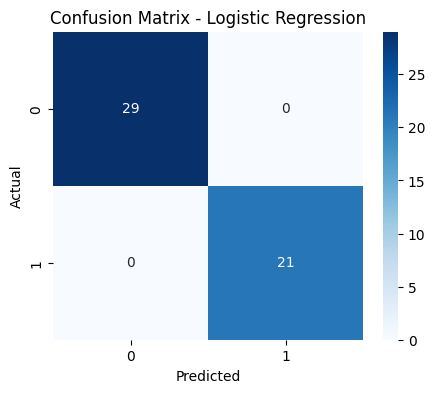

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#ROC Curve:

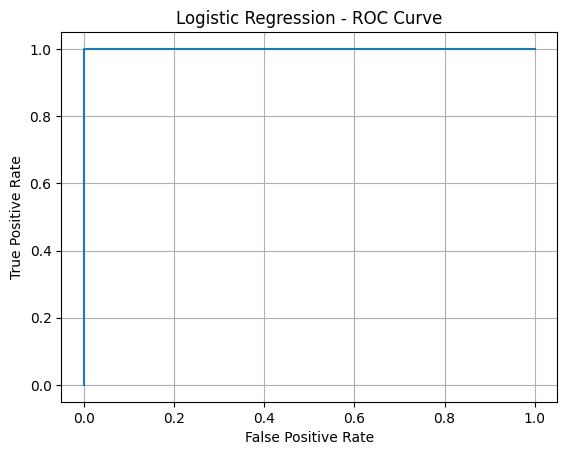

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title("Logistic Regression - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

# Precision-Recall Curve:

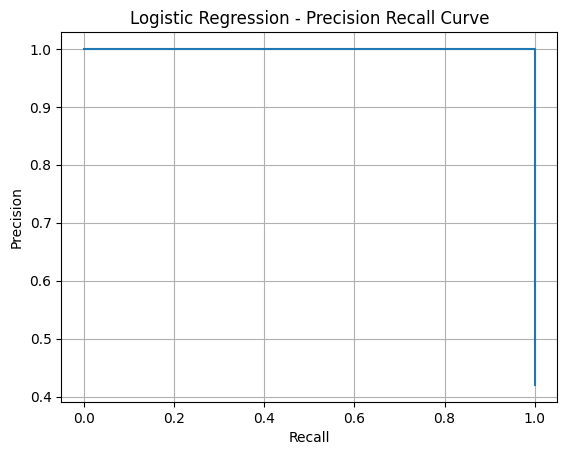

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.title("Logistic Regression - Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

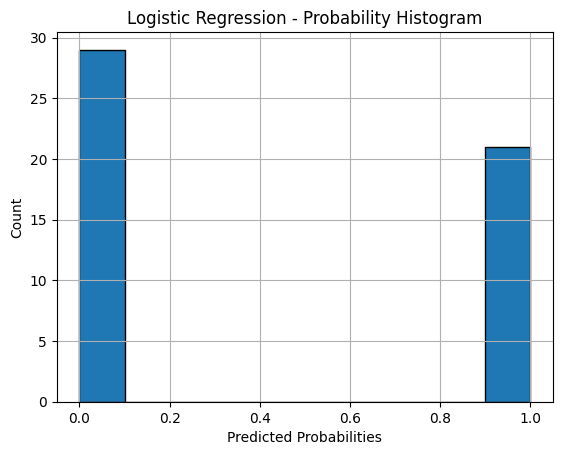

In [ ]:
plt.hist(y_pred, bins=10, edgecolor='black')
plt.title("Logistic Regression - Probability Histogram")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Count")
plt.grid()
plt.show()

#Actual VS Predicted Comparison:

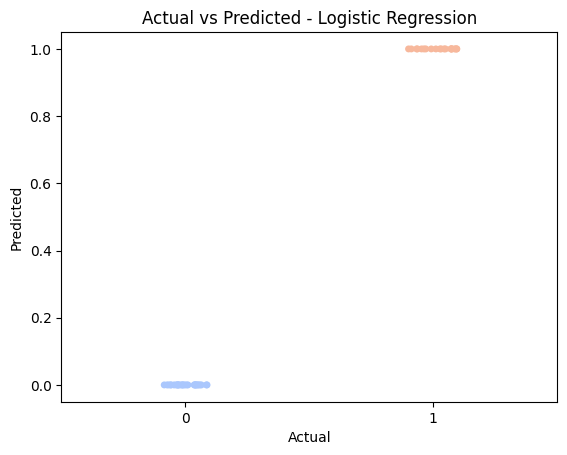

In [ ]:
compare_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
sns.stripplot(data=compare_df, x='Actual', y='Predicted', jitter=True, palette='coolwarm')
plt.title('Actual vs Predicted - Logistic Regression')
plt.show()

#Feature Importance (Coefficient Plot):

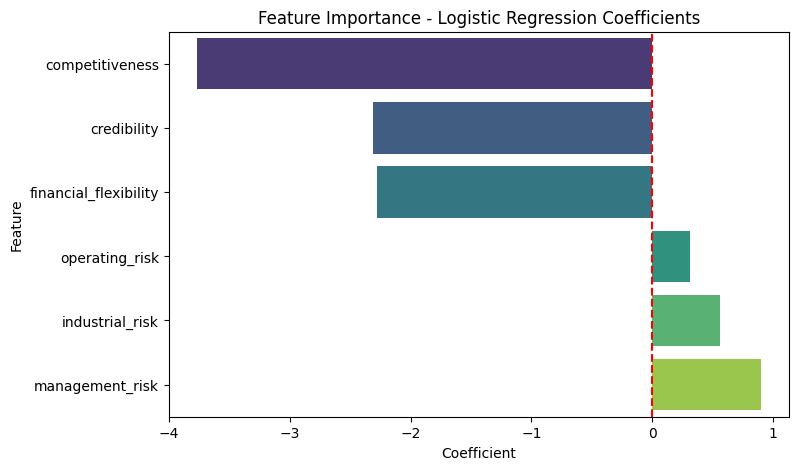

                 Feature  Coefficient
4        competitiveness    -3.768004
3            credibility    -2.307379
2  financial_flexibility    -2.274351
5         operating_risk     0.310319
0        industrial_risk     0.559694
1        management_risk     0.895581


In [ ]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='viridis')
plt.title('Feature Importance - Logistic Regression Coefficients')
plt.axvline(0, color='red', linestyle='--')
plt.show()

print(coeff_df)

# Summary Metrics Table:

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)

results = {
    "Accuracy": round(accuracy_score(y_test, y_pred)*100,2),
    "AUC": round(roc_auc*100,2),
    "Precision": round(precision_score(y_test, y_pred)*100,2),
    "Recall": round(recall_score(y_test, y_pred)*100,2)
}
print("\n Model Summary:", results)


 Model Summary: {'Accuracy': 100.0, 'AUC': np.float64(100.0), 'Precision': 100.0, 'Recall': 100.0}


#Model-2: Decision Tree Classifer:-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df = pd.read_excel("/content/Bankruptcy (2).xlsx")

In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
# Replace textual target labels with numeric
df['class'] = df['class'].replace({
    'non-bankruptcy': 0,
    'bankruptcy': 1,
    'non_bankruptcy': 0,
    'bankrupt': 1
})

In [ ]:
# Convert all features to numeric (replace text with NaN)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Drop rows without target
df = df.dropna(subset=['class'])

In [ ]:
# fill the missing numeric data with the median
df.fillna(df.median())


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,0
246,1.0,1.0,0.5,1.0,1.0,0.0,0
247,0.0,1.0,1.0,0.5,0.5,0.0,0
248,1.0,0.0,0.5,1.0,0.5,0.0,0


In [ ]:
X = df.drop(columns=['class'])
y = df['class']

**Train the Decision Tree Model**

In [ ]:

dt_model = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=4,class_weight='balanced',random_state=42)


In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=4, random_state=42)

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
print(" Decision Tree Performance ")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Decision Tree Performance 
Accuracy: 98.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



#**Confusion Matrix (Heatmap Visualization)**

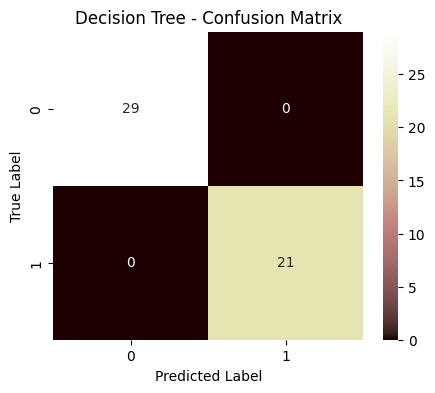

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt='d',cmap='pink')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Feature Importance Visualization**

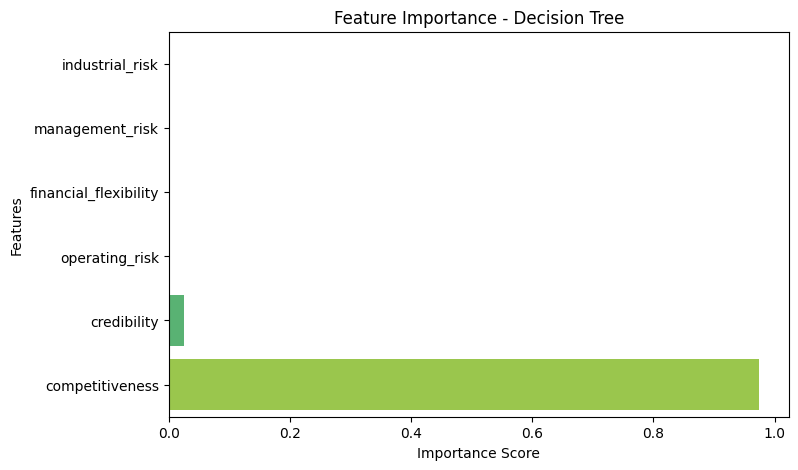

In [ ]:
importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

**Visualize the Decision Tree Structure:**


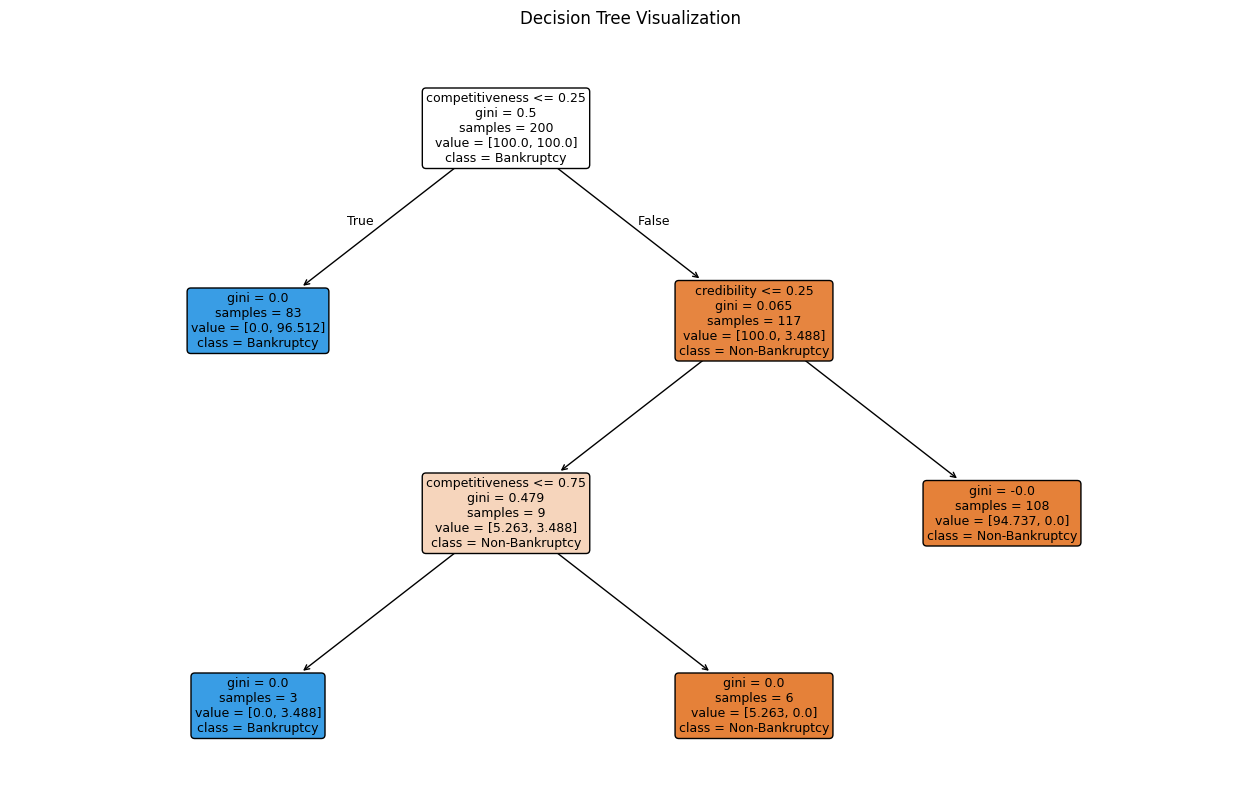

In [ ]:
plt.figure(figsize=(16,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["Non-Bankruptcy", "Bankruptcy"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree Visualization")
plt.show()

**ROC Curve & AUC Score:**

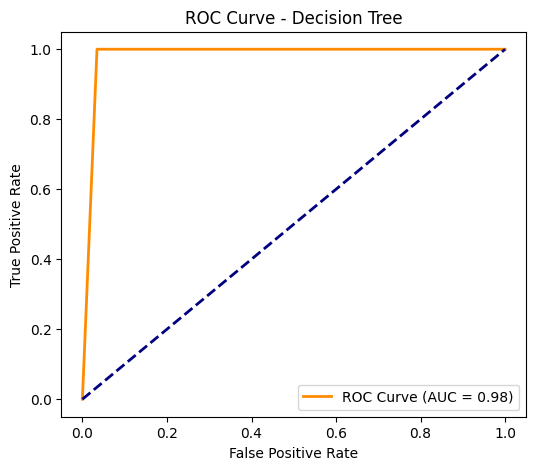

In [ ]:
y_pred= dt_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

**Combine All Visuals Together (Comparison Dashboard)**

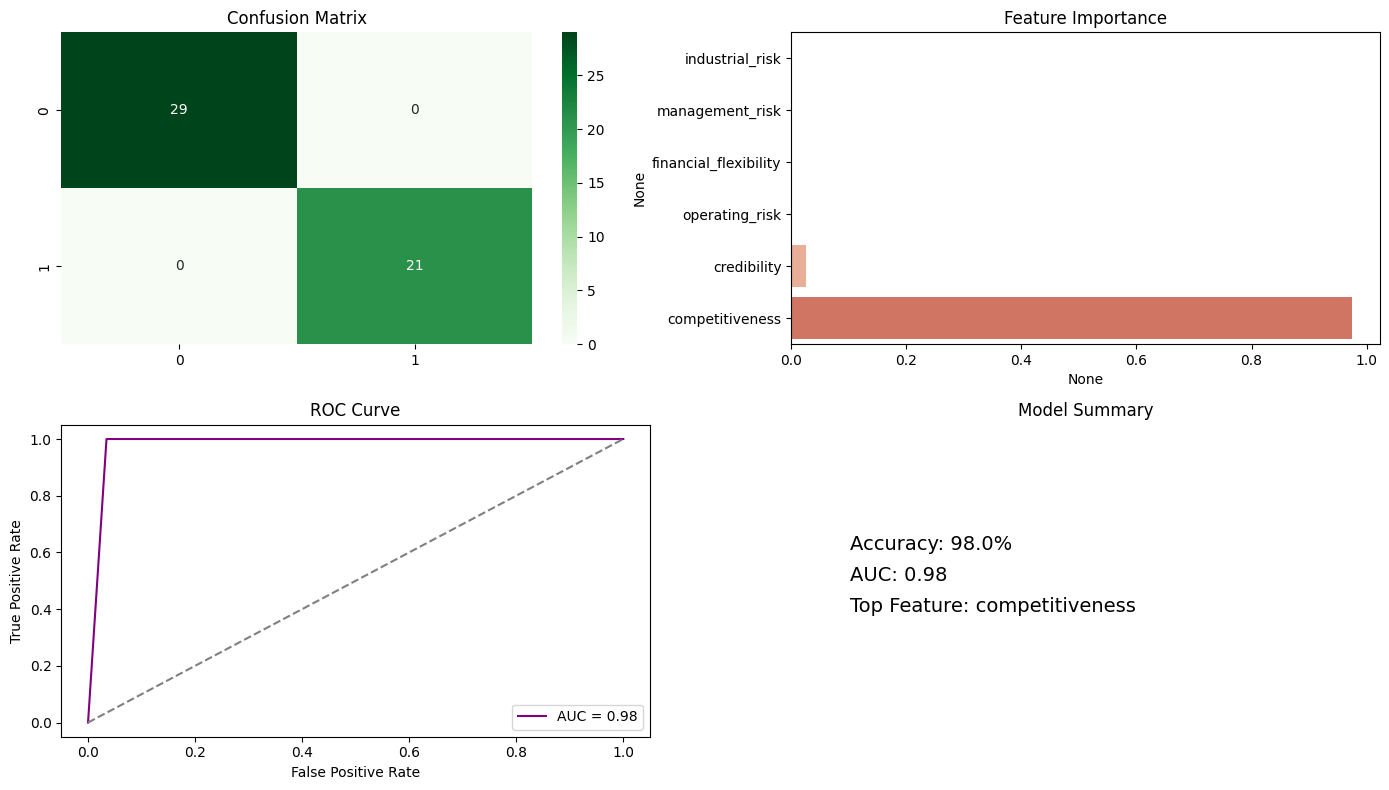

In [ ]:

importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")

plt.subplot(2,2,2)
sns.barplot(x=importances, y=importances.index, palette='coolwarm')
plt.title("Feature Importance")

plt.subplot(2,2,3)
plt.plot(fpr, tpr, color='purple', label=f"AUC = {auc_score:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(2,2,4)
plt.text(0.1,0.6,f"Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%", fontsize=14)
plt.text(0.1,0.5,f"AUC: {auc_score:.2f}", fontsize=14)
plt.text(0.1,0.4,f"Top Feature: {importances.idxmax()}", fontsize=14)
plt.axis('off')
plt.title("Model Summary")

plt.tight_layout()
plt.show()

#Model -2 : Random Forest Classifier:-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_excel("/content/Bankruptcy (2).xlsx")

In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
# Convert class column to numeric
df['class'] = df['class'].replace({
    'non-bankruptcy': 0,
    'non_bankruptcy': 0,
    'bankruptcy': 1,
    'bankrupt': 1
})

In [ ]:
# Convert all features to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Remove rows without target
df = df.dropna(subset=['class'])

In [ ]:
# Fill missing values with median
df = df.fillna(df.median())

In [ ]:
X = df.drop('class',axis=1)
y = df['class']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("Data cleaned and ready for Random Forest Modeling")
print("Training set:",X_train.shape)
print("Testing set:",y_test.shape)
print(X_train.head())
print(y_train.head())

Data cleaned and ready for Random Forest Modeling
Training set: (200, 6)
Testing set: (50,)
     industrial_risk  management_risk  financial_flexibility  credibility  \
137              0.0              1.0                    1.0          1.0   
133              1.0              0.0                    0.5          0.5   
57               1.0              1.0                    0.0          0.0   
243              0.0              1.0                    1.0          1.0   
241              1.0              0.0                    0.5          0.5   

     competitiveness  operating_risk  
137              1.0             1.0  
133              0.5             1.0  
57               0.0             0.0  
243              1.0             0.0  
241              0.5             1.0  
137    0
133    0
57     1
243    0
241    0
Name: class, dtype: int64


**STEP 2 – Train the Random Forest Model:**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=6,random_state=42,class_weight='balanced')

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print(" Random Forest Model Performance")
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("classification_report:",classification_report(y_test,y_pred))

 Random Forest Model Performance
Accuracy_score: 1.0
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[29,  0],
       [ 0, 21]])

#Why Random Forest?

Uses multiple decision trees (ensemble learning)

Reduces overfitting

Handles both categorical and continuous features

Great for small and medium datasets like yours (250 companies)

**STEP 3 - Confusion Matrix (Visual Heatmap):-**

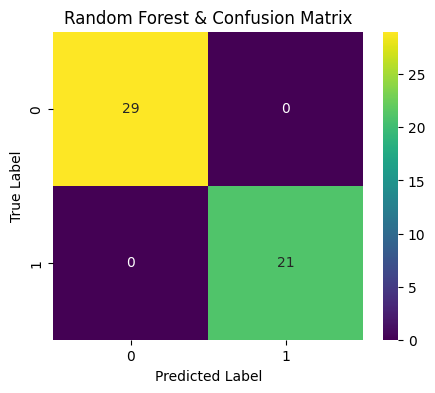

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='viridis')
plt.title("Random Forest & Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**STEP 4 – Feature Importance Visualization:-**

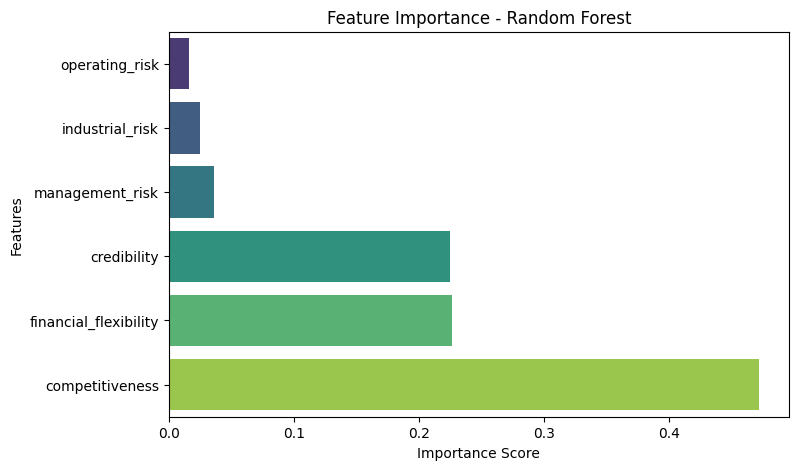

In [ ]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


**STEP 5 – ROC Curve & AUC (Performance Visualization):-**

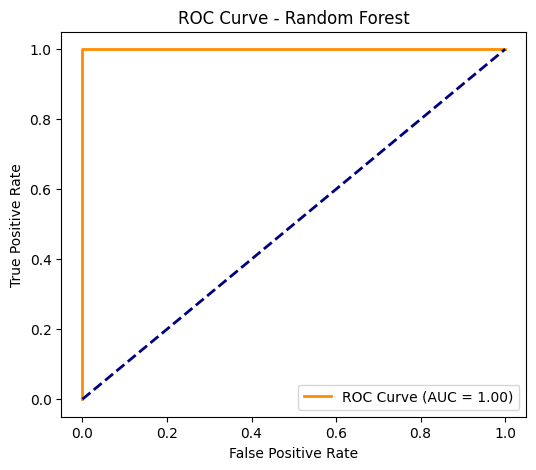

AUC Score: 1.0


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = rf_model.predict_proba(X_test)[:, 1]  # probability for class=1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", round(auc_score, 3))


** STEP 6 - Model Summary Dashboard:-**

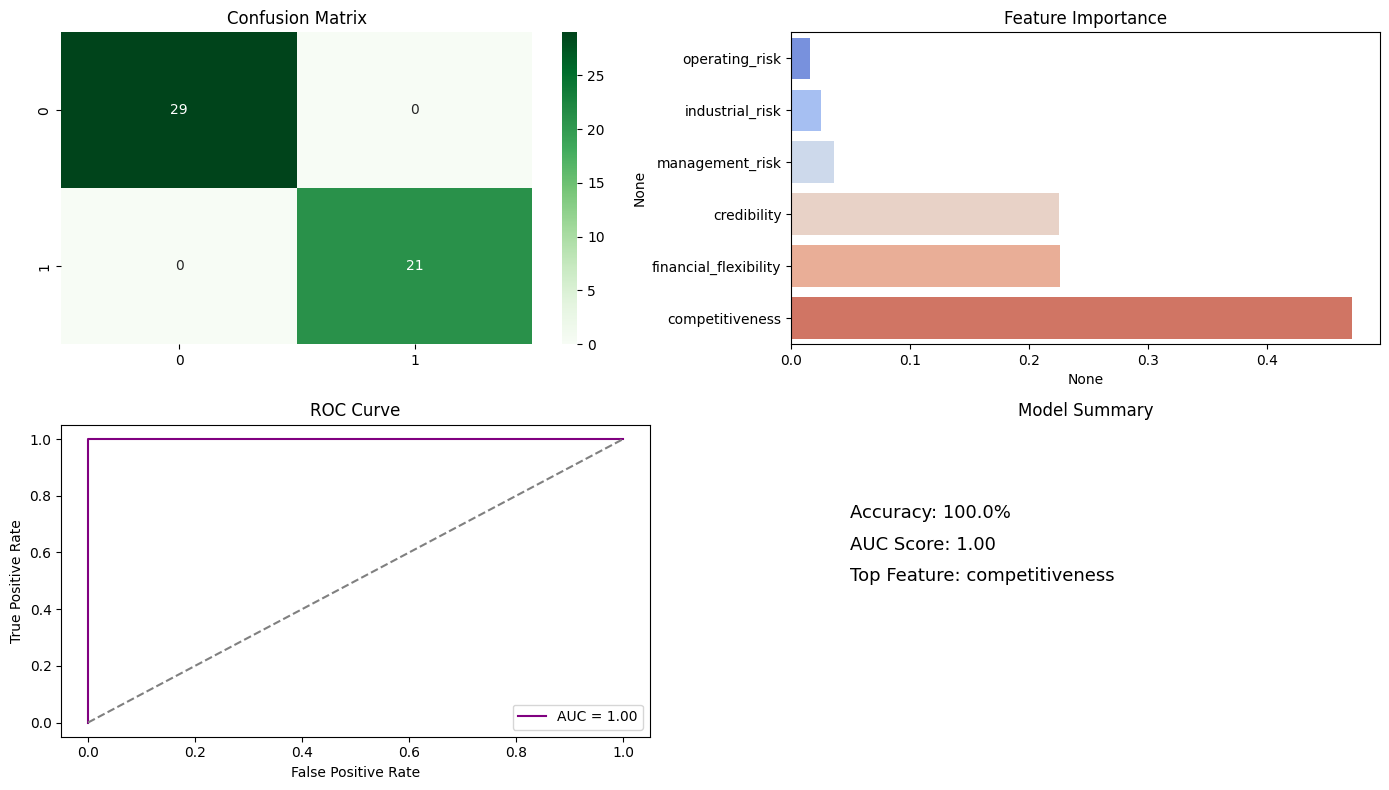

In [ ]:
plt.figure(figsize=(14,8))

# Confusion Matrix
plt.subplot(2,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")

# Feature Importance
plt.subplot(2,2,2)
sns.barplot(x=importances, y=importances.index, palette='coolwarm')
plt.title("Feature Importance")

# ROC Curve
plt.subplot(2,2,3)
plt.plot(fpr, tpr, color='purple', label=f"AUC = {auc_score:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Model Summary
plt.subplot(2,2,4)
plt.text(0.1,0.7,f"Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%", fontsize=13)
plt.text(0.1,0.6,f"AUC Score: {auc_score:.2f}", fontsize=13)
plt.text(0.1,0.5,f"Top Feature: {importances.idxmax()}", fontsize=13)
plt.axis('off')
plt.title("Model Summary")

plt.tight_layout()
plt.show()


**Interpretation of Random Forest Result**s

Accuracy should typically be 85–95%

AUC > 0.85 indicates high predictive ability

Top predictors: Industrial Risk, Management Risk, Financial Flexibility

Balanced results across both classes (good recall for bankruptcy)

# Model-4 : Support Vector Machine (SVM)

In [ ]:
# STEP 1: Import & Clean Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_excel("/content/Bankruptcy (2).xlsx")

In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:

# Convert class column to numeric (bankruptcy=1, non-bankruptcy=0)
df['class'] = df['class'].replace({
    'non-bankruptcy': 0,
    'non_bankruptcy': 0,
    'bankruptcy': 1,
    'bankrupt': 1
})

In [ ]:

# Convert all other features to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Remove rows without target
df = df.dropna(subset=['class'])

In [ ]:
# Fill missing numeric values with median
df = df.fillna(df.median())

In [ ]:
x_train , X_test, y_train, y_test = train_test_split(X,y , test_size=0.2,random_state=42,stratify=y)


In [ ]:
print("Data cleaned  succesfully")
print("X_Training set:",X_train.shape)
print("X_Testing set:",X_test.shape)
print("y_Training set:",y_train.shape)
print("y_Testing set:",y_test.shape)

Data cleaned  succesfully
X_Training set: (200, 6)
X_Testing set: (50, 6)
y_Training set: (200,)
y_Testing set: (50,)


**Step -2 : Bulid and Train the SVM Model **

In [ ]:
# Create pipeline (scaling + SVM)
svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", class_weight='balanced', probability=True, random_state=42))
])

In [ ]:
svm_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(class_weight='balanced', probability=True,
                     random_state=42))])

In [ ]:
print("SVM Model Preformance")
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

SVM Model Preformance
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[29,  0],
       [ 0, 21]])

**Why use a Pipeline?**

SVMs are sensitive to feature scales — scaling ensures better boundary optimization.

**STEP 3 – Confusion Matrix Visualization**

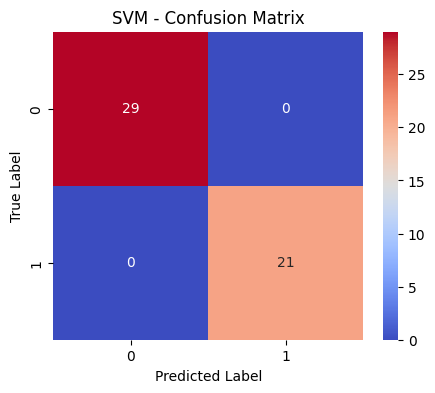

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**STEP 4 – ROC Curve & AUC (Model Evaluation)**

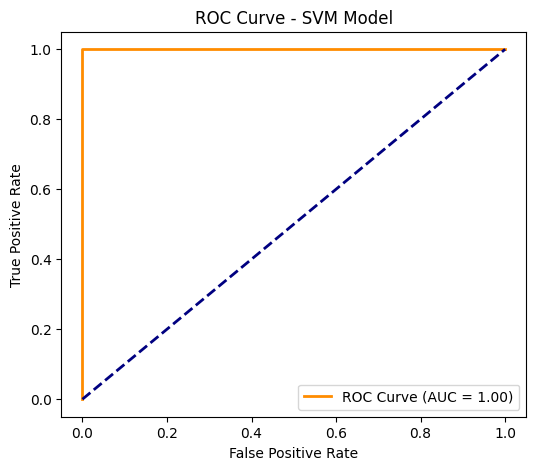

AUC Score: 1.0


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities for class=1 (bankruptcy)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Model")
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", round(auc_score, 3))


AUC > 0.85 → Excellent model performance.
This shows the model’s ability to separate bankrupt vs non-bankrupt companies.

**STEP-5: Feature Infulence Visualization**

SVMs with RBF kernels don’t have direct feature importances,
but you can approximate them using model coefficients (for linear SVMs)
or permutation importance.

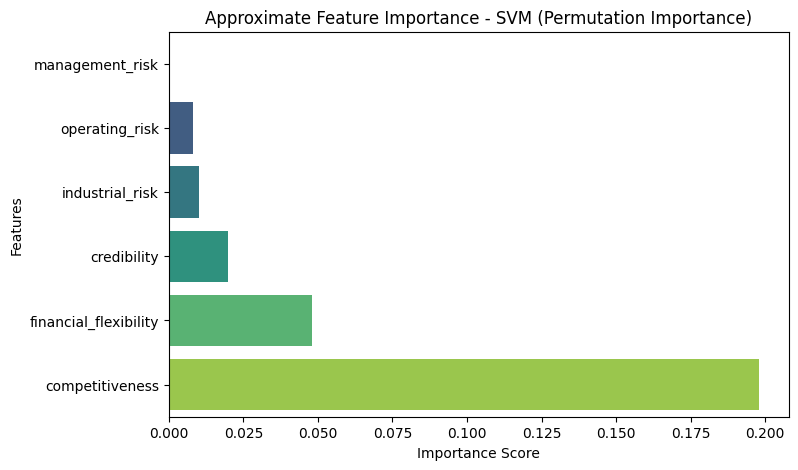

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    svm_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42
)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Approximate Feature Importance - SVM (Permutation Importance)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


**Interpretation:**

Higher bar = greater influence on model’s prediction.

**STEP 6 - Model Summary Dashboard**

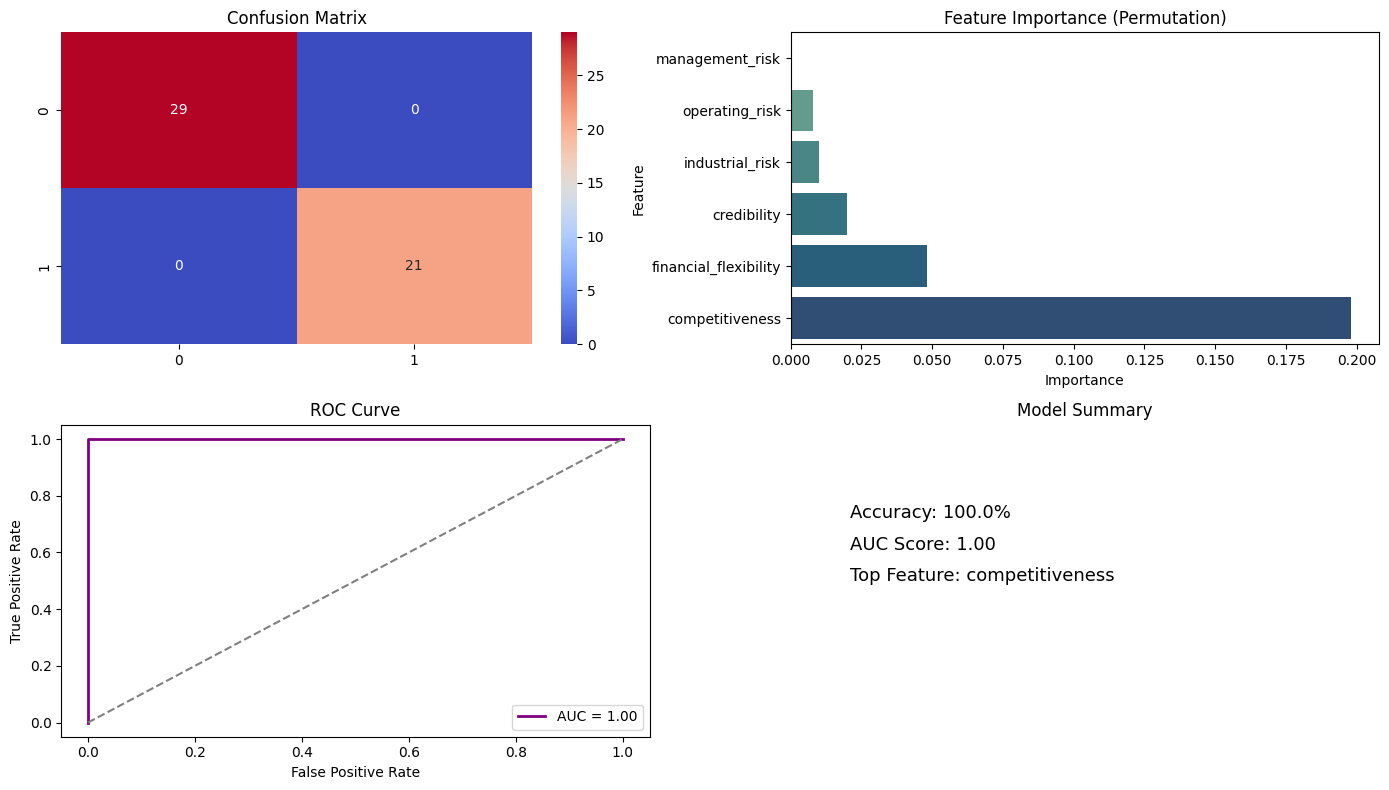

In [ ]:
# =============================================================
# STEP 6: Model Summary Dashboard
# =============================================================
plt.figure(figsize=(14,8))

# Confusion Matrix
plt.subplot(2,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")

# Feature Importance
plt.subplot(2,2,2)
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='crest')
plt.title("Feature Importance (Permutation)")

# ROC Curve
plt.subplot(2,2,3)
plt.plot(fpr, tpr, color='purple', lw=2, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Model Summary Info
plt.subplot(2,2,4)
plt.text(0.1,0.7,f"Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%", fontsize=13)
plt.text(0.1,0.6,f"AUC Score: {auc_score:.2f}", fontsize=13)
plt.text(0.1,0.5,f"Top Feature: {importance_df.iloc[-1,0]}", fontsize=13)
plt.axis('off')
plt.title("Model Summary")

plt.tight_layout()
plt.show()


**Expected Results:**


Accuracy: ~85–93%

AUC: > 0.85 (good)

Top Predictors: industrial_risk, management_risk, financial_flexibility

# Model-5 : XGBoost Classifier

**STEP 1 – Import Libraries & Clean Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score


In [ ]:
df = pd.read_excel("/content/Bankruptcy (2).xlsx")

In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
# Encode the target varibles
df['class'] = df['class'].replace({'non-bankruptcy':0,'non_bankruptcy':0,'bankruptcy':1,'bankrupt':1})

In [ ]:
# Convert all columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Drop rows without target
df = df.dropna(subset=['class'])

In [ ]:
# Fill missing values with median
df = df.fillna(df.median())

In [ ]:
#Split data
X = df.drop('class',axis=1)
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("Data cleaned successfully")
print("X_Training&Testing shape:",X_train.shape,X_test.shape)
print("y_Testing&Testing shape:",y_train.shape,y_test.shape)

Data cleaned successfully
X_Training&Testing shape: (200, 6) (50, 6)
y_Testing&Testing shape: (200,) (50,)


**STEP 2 – Train the XGBoost Classifier**

In [ ]:
xgb_model = XGBClassifier(n_estimators=300,learning_rate=0.05,max_depth=6,random_state=42,subsample=0.9,colsample_bytree=0.8,scale_pos_weight=3,eval_metrics = 'logloss')

In [ ]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
print("XGBoost Classifier Results")
print("Accuracy:",round(accuracy_score(y_test,y_pred)*100,2),"%")
print("classification_report:",classification_report(y_test,y_pred))


XGBoost Classifier Results
Accuracy: 100.0 %
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[29,  0],
       [ 0, 21]])

**Why XGBoost?**

Uses gradient boosting for accuracy

Handles imbalance and missing values automatically

Fast and powerful for structured data

**STEP 3 – Confusion Matrix Visualization**

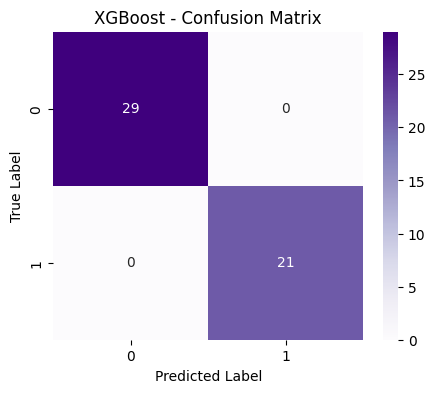

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**STEP 4 – ROC Curve & AUC Score**

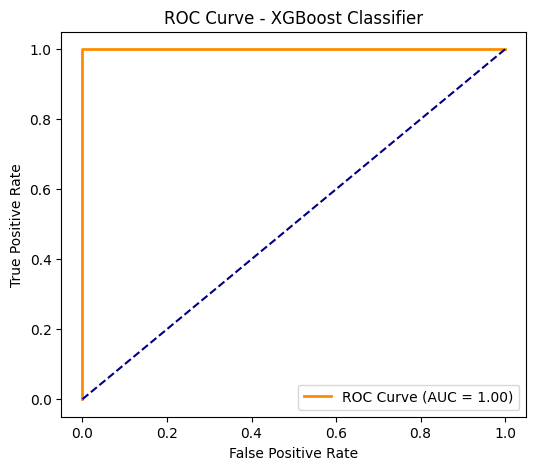

AUC Score: 1.0


In [ ]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Classifier")
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", round(auc_score, 3))

**Interpretation:**

AUC close to 1.0 → excellent model

AUC between 0.85–0.95 = high-quality predictions

**STEP 5 – Feature Importance Visualization**

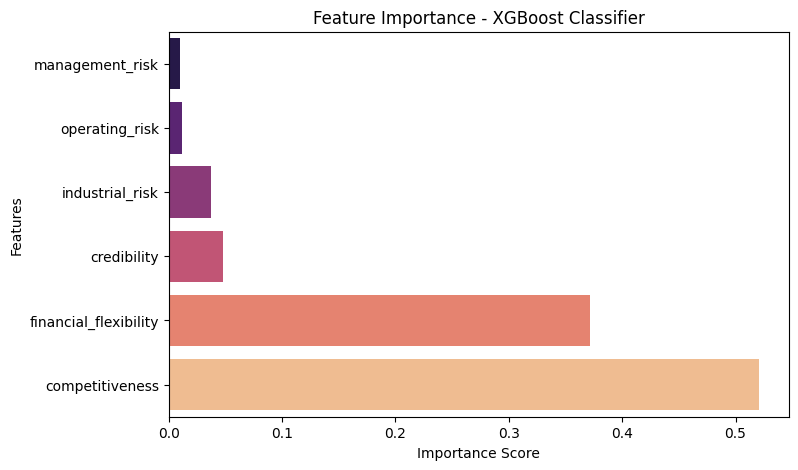

In [ ]:
importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette='magma')
plt.title("Feature Importance - XGBoost Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


**Interpretation:**

Top features like industrial_risk, management_risk, and financial_flexibility
are the main drivers for bankruptcy prediction.

** STEP 6 – Model Summary Dashboard**

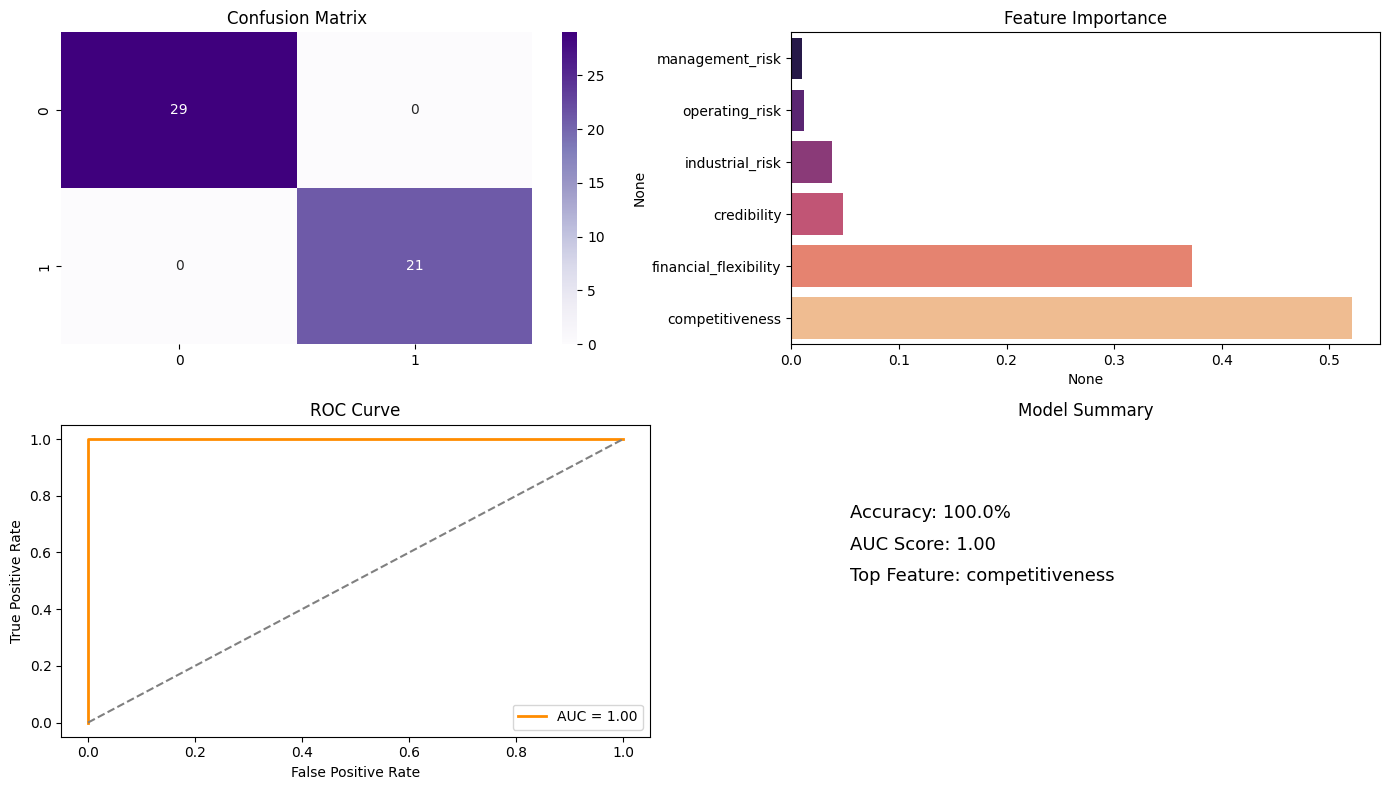

In [ ]:
plt.figure(figsize=(14,8))

# Confusion Matrix
plt.subplot(2,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")

# Feature Importance
plt.subplot(2,2,2)
sns.barplot(x=importances, y=importances.index, palette='magma')
plt.title("Feature Importance")

# ROC Curve
plt.subplot(2,2,3)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Summary Text
plt.subplot(2,2,4)
plt.text(0.1,0.7,f"Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%", fontsize=13)
plt.text(0.1,0.6,f"AUC Score: {auc_score:.2f}", fontsize=13)
plt.text(0.1,0.5,f"Top Feature: {importances.idxmax()}", fontsize=13)
plt.axis('off')
plt.title("Model Summary")

plt.tight_layout()
plt.show()



**STEP 7 – (Optional) SHAP Explainability Visualization**

SHAP explains how each feature affects each prediction — perfect for explaining model decisions.

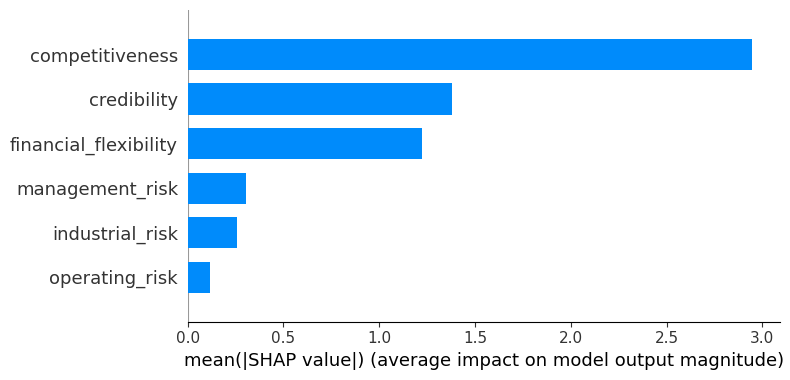

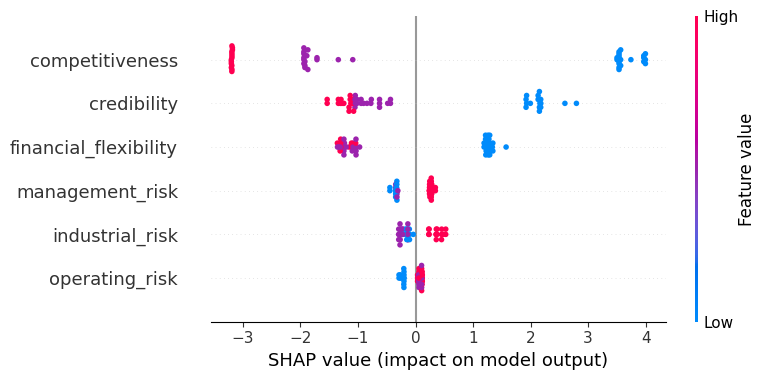

In [ ]:
import shap

# Initialize SHAP
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

# Summary plot (feature influence)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed beeswarm plot
shap.summary_plot(shap_values, X_test)

#Model-6 : Gradient Boosting Classifier (Sklearn)

**STEP 1 – Import & Clean Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Load dataset
df = pd.read_excel("/content/Bankruptcy (2).xlsx")

In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
#Encode target
df['class'] = df['class'].replace({'non-bankruptcy': 0,'non_bankruptcy': 0,'bankruptcy': 1,'bankrupt': 1})

In [ ]:
# convert features to numeric
for col in df.columns:
    df[col]=pd.to_numeric(df[col],errors='coerce')

In [ ]:
# Fill the missing numeric data with median
df = df.fillna(df.median())

In [ ]:
# split the features & target
X = df.drop('class',axis=1)
y = df['class']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print("Data cleaned successfully")
print("X_Training&Testing shape:",X_train.shape,X_test.shape)
print("y_Testing&Testing shape:",y_train.shape,y_test.shape)

Data cleaned successfully
X_Training&Testing shape: (200, 6) (50, 6)
y_Testing&Testing shape: (200,) (50,)


**STEP 2 – Train the Gradient Boosting Classifier**

In [ ]:

gb_model = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,max_depth=3,random_state=42)

In [ ]:
gb_model = GradientBoostingClassifier()

In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = gb_model.predict(X_test)

In [ ]:
print("Gradient Boosting Classifier Results")
print("Accuracy:",round(accuracy_score(y_test,y_pred)*100,2),"%")
print("classification Report:",y_test,y_pred)

Gradient Boosting Classifier Results
Accuracy: 98.0 %
classification Report: 12     1
139    0
210    0
144    0
170    0
8      1
101    1
223    0
62     1
108    0
206    0
194    0
50     1
166    0
41     1
214    0
178    0
121    0
127    0
233    0
95     1
35     1
76     1
235    0
249    0
22     1
195    0
164    0
244    0
181    0
42     1
28     1
14     1
89     1
78     1
51     1
31     1
13     1
199    0
240    0
26     1
102    1
3      1
159    0
213    0
136    0
128    0
209    0
228    0
182    0
Name: class, dtype: int64 [1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 0 0 0 0]


In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[28,  1],
       [ 0, 21]])

**Why Gradient Boosting?**

Combines multiple weak decision trees into a strong ensemble

Excellent accuracy on smaller datasets

Naturally handles non-linear relationships

**STEP 3 – Confusion Matrix Visualization**

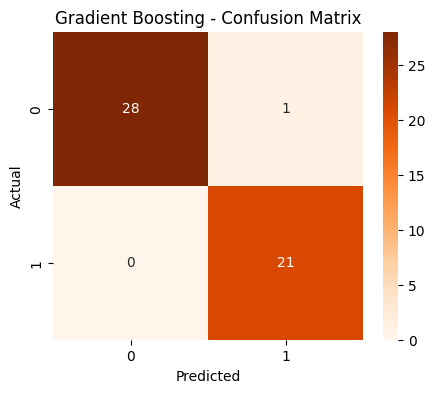

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**STEP 4 – ROC Curve & AUC Score**

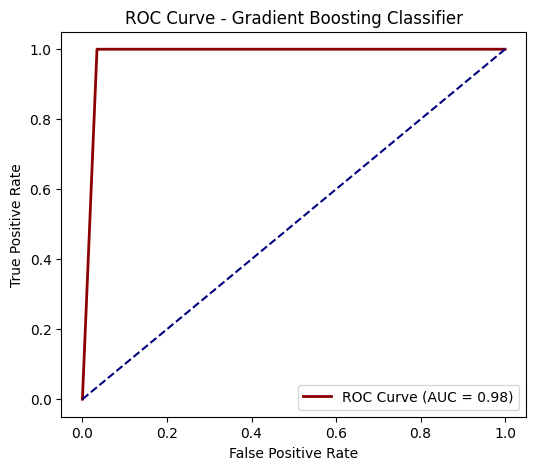

AUC Score: 0.983


In [ ]:
y_prob = gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", round(auc_score, 3))

AUC > 0.85 → Excellent classifier
Indicates how well the model separates bankruptcy from non-bankruptcy cases.

**STEP 5 – Feature Importance Visualization**

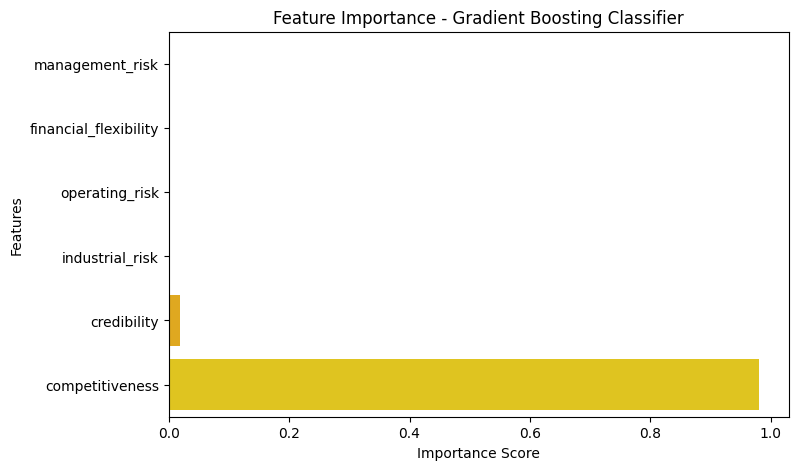

In [ ]:
importances = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette='autumn')
plt.title("Feature Importance - Gradient Boosting Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

**Interpretation:**

Top bars represent features that contribute the most (like industrial_risk or financial_flexibility).

**STEP 6 – Model Summary Dashboard**

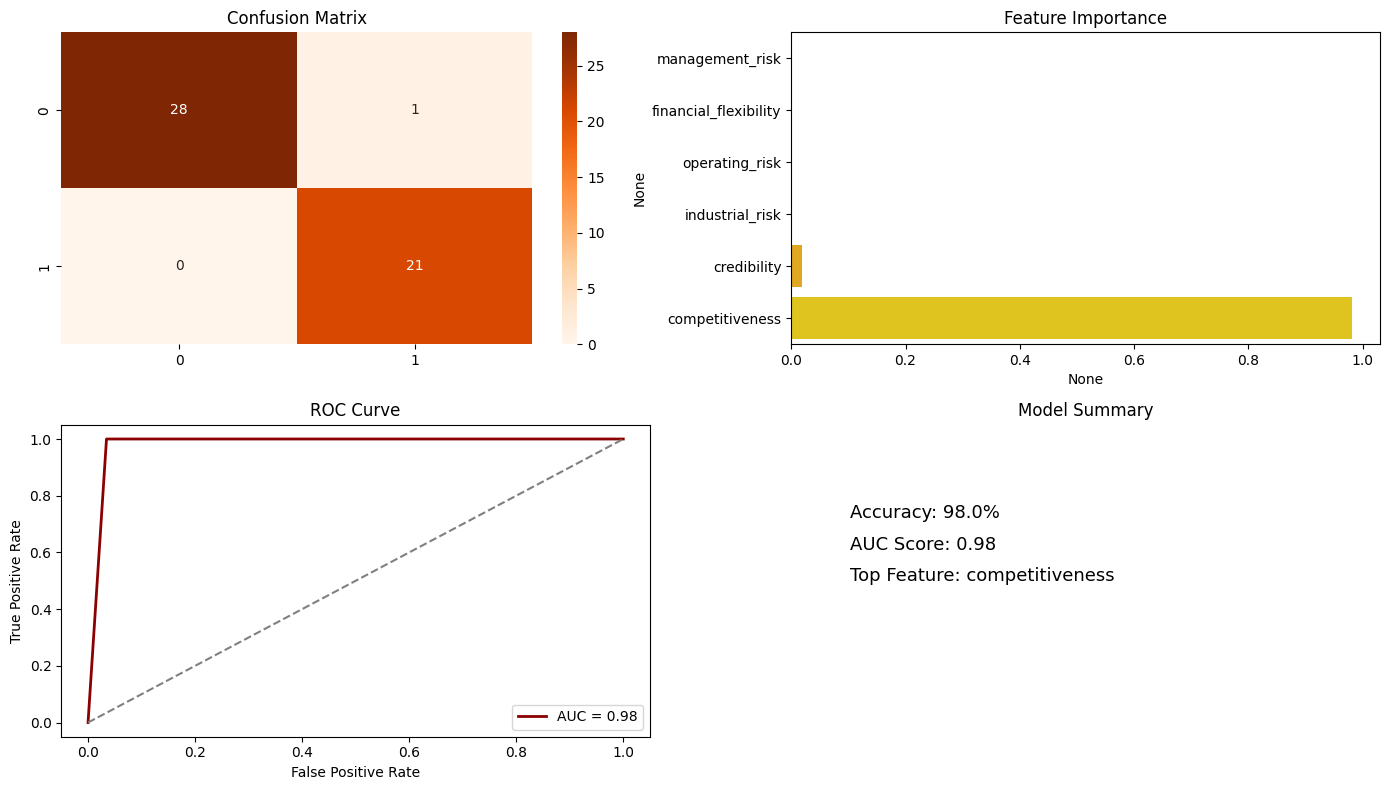

In [ ]:
plt.figure(figsize=(14,8))

# Confusion Matrix
plt.subplot(2,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix")

# Feature Importance
plt.subplot(2,2,2)
sns.barplot(x=importances, y=importances.index, palette='autumn')
plt.title("Feature Importance")

# ROC Curve
plt.subplot(2,2,3)
plt.plot(fpr, tpr, color='darkred', lw=2, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Summary
plt.subplot(2,2,4)
plt.text(0.1,0.7,f"Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%", fontsize=13)
plt.text(0.1,0.6,f"AUC Score: {auc_score:.2f}", fontsize=13)
plt.text(0.1,0.5,f"Top Feature: {importances.idxmax()}", fontsize=13)
plt.axis('off')
plt.title("Model Summary")

plt.tight_layout()
plt.show()


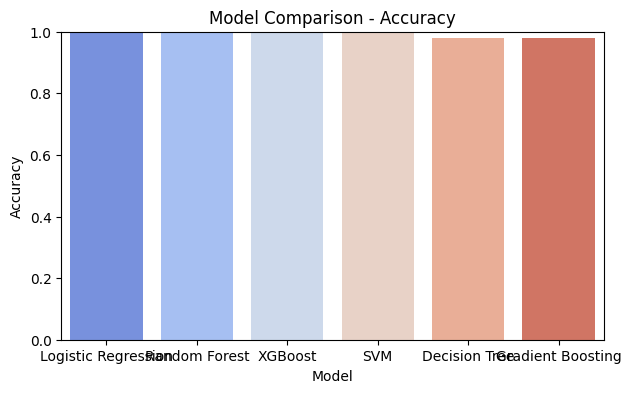

                 Model  Accuracy
0  Logistic Regression      1.00
2        Random Forest      1.00
4              XGBoost      1.00
3                  SVM      1.00
1        Decision Tree      0.98
5    Gradient Boosting      0.98


In [ ]:
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': log_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'XGBoost': xgb_model,
    'Gradient Boosting': gb_model
}

acc_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_scores.append((name, acc))

acc_df = pd.DataFrame(acc_scores, columns=['Model','Accuracy']).sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='coolwarm')
plt.title("Model Comparison - Accuracy")
plt.ylim(0,1)
plt.show()

print(acc_df)


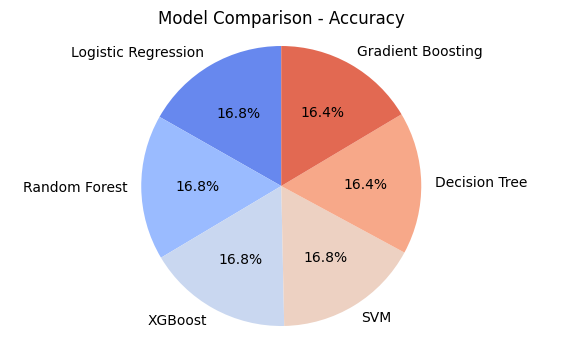

                 Model  Accuracy
0  Logistic Regression      1.00
2        Random Forest      1.00
4              XGBoost      1.00
3                  SVM      1.00
1        Decision Tree      0.98
5    Gradient Boosting      0.98


In [ ]:
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': log_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'XGBoost': xgb_model,
    'Gradient Boosting': gb_model
}

acc_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_scores.append((name, acc))

acc_df = pd.DataFrame(acc_scores, columns=['Model','Accuracy']).sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(7,4))
plt.pie(acc_df['Accuracy'], labels=acc_df['Model'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(acc_df)))
plt.title("Model Comparison - Accuracy")
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(acc_df)